In [1]:
import pandas as pd

dataset_path = "/Users/sasanksasi/Downloads/project/cloudverse.ai/subpart_data.csv"
new_data = pd.read_csv(dataset_path)

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib  

# Assuming the new data is loaded into a DataFrame named `new_data`
# and the saved models are named 'model_cpu_usage.pkl', 'model_memory_usage.pkl', 'model_network_traffic.pkl'

def preprocess_data(data):
    # Fill missing numeric values with mean
    data.fillna(data.mean(numeric_only=True), inplace=True)
    
    # Fill missing categorical values with mode
    for column in ['task_type', 'task_priority', 'task_status']:
        data[column] = data[column].fillna(data[column].mode()[0])
    
    # Normalize specified columns
    columns_to_normalize = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']
    scaler = MinMaxScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    
    # Convert 'timestamp' to datetime and extract features
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['hour_of_day'] = data['timestamp'].dt.hour
    data['day_of_week'] = data['timestamp'].dt.dayofweek
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['task_type_encoded'] = label_encoder.fit_transform(data['task_type'])
    data['task_priority_encoded'] = label_encoder.fit_transform(data['task_priority'])
    data['task_status_encoded'] = label_encoder.fit_transform(data['task_status'])
    
    # Drop original categorical columns and 'timestamp'
    processed_data = data.drop(['timestamp', 'task_type', 'task_priority', 'task_status'], axis=1)
    
    # Ensure all expected features are present (adjust this list based on the actual model requirements)
    expected_features = ['hour_of_day', 'day_of_week', 'cpu_usage_7d_avg', 'memory_usage_7d_avg', 'task_type_encoded', 'task_priority_encoded', 'task_status_encoded', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']
    missing_features = set(expected_features) - set(processed_data.columns)
    for feature in missing_features:
        processed_data[feature] = 0  # Assuming 0 is a reasonable default for missing features; adjust as necessary
    
    return processed_data

def prepare_features(data):
    # Ensure the features are in the exact order as during model training
    ordered_features = [
        'power_consumption', 
        'num_executed_instructions', 
        'execution_time', 
        'energy_efficiency', 
        'hour_of_day', 
        'day_of_week', 
        'cpu_usage_7d_avg', 
        'memory_usage_7d_avg', 
        'task_type_encoded', 
        'task_priority_encoded', 
        'task_status_encoded'
    ]
    
    # Select and order the features from the data
    X = data[ordered_features]
    return X

def make_predictions(X):
    # Load the saved models
    model_cpu_usage = joblib.load('/Users/sasanksasi/Downloads/project/cloudverse.ai/models/lgbm_cpu_usage.joblib')
    model_memory_usage = joblib.load('models/rf_memory_usage.joblib')
    model_network_traffic = joblib.load('/Users/sasanksasi/Downloads/project/cloudverse.ai/models/lgbm_network_traffic.joblib')
    
    # Make predictions
    predictions = {
        'cpu_usage': model_cpu_usage.predict(X),
        'memory_usage': model_memory_usage.predict(X),
        'network_traffic': model_network_traffic.predict(X)
    }
    
    return predictions

# Main function to process new data and make predictions
def process_and_predict(new_data):
    preprocessed_data = preprocess_data(new_data)
    features = prepare_features(preprocessed_data)
    predictions = make_predictions(features)
    return predictions


predictions = process_and_predict(new_data)
print(predictions)

{'cpu_usage': array([0.20787593, 0.21342992, 0.21529425, 0.21325153, 0.21672568,
       0.22777542, 0.21292281, 0.22405875, 0.23623302, 0.20837431,
       0.2183395 , 0.21083427, 0.20884744, 0.22331425, 0.21481693,
       0.22364802, 0.21115862, 0.21574776, 0.21587014, 0.21219074,
       0.22179339, 0.23161406, 0.21320459, 0.21471678, 0.21365011,
       0.21556754, 0.22113476, 0.21877668, 0.21692187, 0.22268293,
       0.21510034, 0.21289312, 0.23648165, 0.24004177, 0.23340908,
       0.21627902, 0.2294514 , 0.2232466 , 0.21724867, 0.21133225,
       0.22748533, 0.23976306, 0.21651555, 0.21060792, 0.21654468,
       0.22644583, 0.22305916, 0.21436356, 0.21524632, 0.21766843,
       0.20945257, 0.21535535, 0.21616325, 0.23196625, 0.21607781,
       0.21197413, 0.22720862, 0.2111821 , 0.21903238, 0.21503245,
       0.21639273, 0.21163929, 0.23020646, 0.21679575, 0.22002648,
       0.21066773, 0.23324424, 0.21390512, 0.23063035, 0.22184149,
       0.23866291, 0.21293347, 0.22398194, 0.210

cpu_usage: [0.20787593 0.21342992 0.21529425 0.21325153 0.21672568 0.22777542
 0.21292281 0.22405875 0.23623302 0.20837431 0.2183395  0.21083427
 0.20884744 0.22331425 0.21481693 0.22364802 0.21115862 0.21574776
 0.21587014 0.21219074 0.22179339 0.23161406 0.21320459 0.21471678
 0.21365011 0.21556754 0.22113476 0.21877668 0.21692187 0.22268293
 0.21510034 0.21289312 0.23648165 0.24004177 0.23340908 0.21627902
 0.2294514  0.2232466  0.21724867 0.21133225 0.22748533 0.23976306
 0.21651555 0.21060792 0.21654468 0.22644583 0.22305916 0.21436356
 0.21524632 0.21766843 0.20945257 0.21535535 0.21616325 0.23196625
 0.21607781 0.21197413 0.22720862 0.2111821  0.21903238 0.21503245
 0.21639273 0.21163929 0.23020646 0.21679575 0.22002648 0.21066773
 0.23324424 0.21390512 0.23063035 0.22184149 0.23866291 0.21293347
 0.22398194 0.21014024 0.22367151 0.21510034 0.2420226  0.21577163
 0.23089394 0.22959739 0.21587014 0.22366501 0.23560653 0.21624974
 0.23090072 0.2260626  0.21459473 0.2122658  0.2161

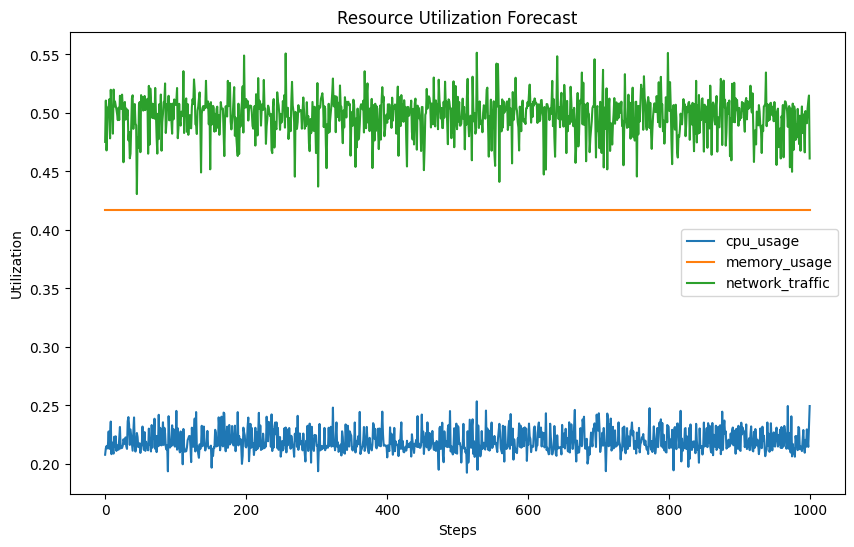

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def rolling_forecast(preprocessed_data, steps=1):
    predictions = {'cpu_usage': [], 'memory_usage': [], 'network_traffic': []}
    for step in range(steps):
        # Prepare features for the current step
        features = prepare_features(preprocessed_data)
        
        # Make predictions
        step_predictions = make_predictions(features)
        
        # Append predictions
        for key in predictions:
            predictions[key].append(step_predictions[key][0])  # Assuming single-step forecast
        
        
    return predictions

for key, values in predictions.items():
    print(f"{key}: {values}")
    
plt.figure(figsize=(10, 6))
for key, values in predictions.items():
    plt.plot(values, label=key)

plt.title('Resource Utilization Forecast')
plt.xlabel('Steps')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [5]:
from scipy.optimize import linprog

def optimize_resource_allocation(predictions):
    # Example: Define costs for CPU, memory, and network resources
    cost_per_unit = [1.0, 1.2, 0.8]  # Example costs
    
    # Constraints: Define minimum resource requirements based on predictions
    # This is a simplified example. You'll need to adjust it based on your actual constraints and requirements.
    min_requirements = [np.mean(predictions['cpu_usage']), np.mean(predictions['memory_usage']), np.mean(predictions['network_traffic'])]
    
    # The bounds for each resource (e.g., minimum and maximum available units)
    bounds = [(0, None), (0, None), (0, None)]  # Assuming no upper limit for simplicity
    
    # Objective: Minimize the total cost of resources
    res = linprog(c=cost_per_unit, A_ub=[-1*np.array(cost_per_unit)], b_ub=[-1*np.sum(min_requirements)], bounds=bounds, method='highs')
    
    if res.success:
        optimal_allocation = res.x
        return optimal_allocation
    else:
        return None

optimal_allocation = optimize_resource_allocation(predictions)
print("Optimal Resource Allocation:", optimal_allocation)

Optimal Resource Allocation: [1.13443985 0.         0.        ]


cpu_usage is a potential bottleneck: False
memory_usage is a potential bottleneck: False
network_traffic is a potential bottleneck: False


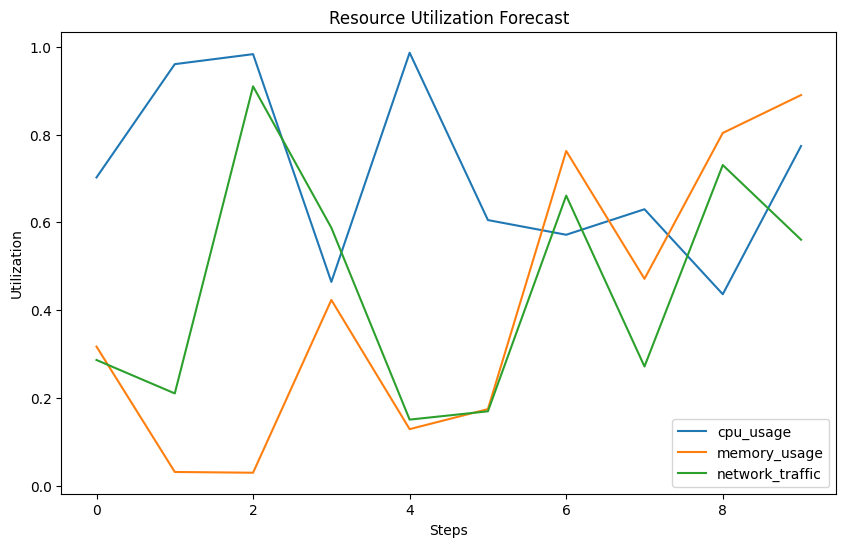

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder for prepare_features and make_predictions functions
def prepare_features(data):
    # Implement your feature preparation logic
    return data

def make_predictions(features):
    # Implement your prediction logic
    # This is a placeholder returning random predictions
    return {'cpu_usage': np.random.rand(1), 'memory_usage': np.random.rand(1), 'network_traffic': np.random.rand(1)}

def rolling_forecast(preprocessed_data, steps=1):
    predictions = {'cpu_usage': [], 'memory_usage': [], 'network_traffic': []}
    for step in range(steps):
        features = prepare_features(preprocessed_data)
        step_predictions = make_predictions(features)
        for key in predictions:
            predictions[key].append(step_predictions[key][0])
    return predictions

# Assuming preprocessed_data is defined
predictions = rolling_forecast(preprocess_data, steps=10)

capacity_limits = {
    'cpu_usage': 90,
    'memory_usage': 80,
    'network_traffic': 70
}

def identify_bottlenecks(predictions, capacity_limits):
    bottlenecks = {}
    for key, forecasted_values in predictions.items():
        if any(value > capacity_limits[key] for value in forecasted_values):
            bottlenecks[key] = True
        else:
            bottlenecks[key] = False
    return bottlenecks


predictions = rolling_forecast(preprocess_data, steps=10)
bottlenecks = identify_bottlenecks(predictions, capacity_limits)

for resource, is_bottleneck in bottlenecks.items():
    print(f"{resource} is a potential bottleneck: {is_bottleneck}")

plt.figure(figsize=(10, 6))
for key, values in predictions.items():
    plt.plot(values, label=key)

plt.title('Resource Utilization Forecast')
plt.xlabel('Steps')
plt.ylabel('Utilization')
plt.legend()
plt.show()